In [6]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# === RELATIVE PATH SETUP FOR JUPYTER ===
base_dir = os.getcwd()  # Gets current working directory (works in Jupyter)
data_folder = os.path.join(base_dir, "..", "..", "A_data")
real_folder = os.path.join(data_folder, "real")
fake_folder = os.path.join(data_folder, "fake")
output_csv = os.path.join(base_dir, "features_combined.csv")  # Output CSV filename

# === FEATURE EXTRACTION FUNCTION ===
def extract_features(filepath):
    try:
        y, sr = librosa.load(filepath, sr=None)

        # MFCCs (13 coefficients)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1)
        mfccs_std = np.std(mfccs, axis=1)

        # Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_mean = np.mean(zcr)

        # Root Mean Square Energy
        rms = librosa.feature.rms(y=y)
        rms_mean = np.mean(rms)

        features = list(mfccs_mean) + list(mfccs_std) + [zcr_mean, rms_mean]
        return features
    except Exception as e:
        print(f"⚠️ Skipping file {filepath} due to error: {e}")
        return None

# === PROCESS FILES FUNCTION ===
def process_folder(folder_path, label):
    data = []
    for filename in tqdm(os.listdir(folder_path), desc=f"Processing label {label} folder"):
        if filename.endswith(".wav") and not filename.startswith("._"):
            filepath = os.path.join(folder_path, filename)
            features = extract_features(filepath)
            if features:
                features.append(label)
                data.append(features)
    return data

# === COMBINE DATA ===
all_data = process_folder(real_folder, 1)  # 1 = Real
all_data += process_folder(fake_folder, 0)  # 0 = Fake

columns = [f"mfcc_mean_{i+1}" for i in range(13)] + \
          [f"mfcc_std_{i+1}" for i in range(13)] + \
          ["zcr", "rms", "label"]

# === SAVE TO CSV ===
df = pd.DataFrame(all_data, columns=columns)
df.to_csv(output_csv, index=False)

print(f"\n✅ Combined feature extraction complete. Saved to: {output_csv}")

Processing label 0 folder: 100%|██████████| 268/268 [03:48<00:00,  1.17it/s]


✅ Combined feature extraction complete. Saved to: /Volumes/T7/Capstone Proj/Model_1/Models/Feature extraction/features_combined.csv


In [2]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
# === RELATIVE PATH SETUP ===
base_dir = os.path.dirname(os.getcwd())  # gets /Volumes/T7/Capstone Proj/Model_1
data_folder = os.path.join(base_dir, "A_data")
real_folder = os.path.join(data_folder, "real")
fake_folder = os.path.join(data_folder, "fake")
output_csv = os.path.join(base_dir, "Extracted Features", "features_combined_extended.csv")

# === FEATURE EXTRACTION FUNCTION ===
def extract_features(filepath):
    try:
        y, sr = librosa.load(filepath, sr=None)

        # MFCCs (13 coefficients)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1)
        mfccs_std = np.std(mfccs, axis=1)

        # Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_mean = np.mean(zcr)

        # Root Mean Square Energy
        rms = librosa.feature.rms(y=y)
        rms_mean = np.mean(rms)

        # Spectral features
        spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        spec_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        spec_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))

        # Pitch (from piptrack)
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitches = pitches[pitches > 0]
        pitch_mean = np.mean(pitches) if len(pitches) > 0 else 0
        pitch_std = np.std(pitches) if len(pitches) > 0 else 0

        features = list(mfccs_mean) + list(mfccs_std) + \
                   [zcr_mean, rms_mean,
                    spec_centroid, spec_bandwidth, spec_rolloff, spec_contrast,
                    pitch_mean, pitch_std]
        return features

    except Exception as e:
        print(f"⚠️ Skipping file {filepath} due to error: {e}")
        return None

# === PROCESS FILES FUNCTION ===
def process_folder(folder_path, label):
    data = []
    for filename in tqdm(os.listdir(folder_path), desc=f"Processing label {label} folder"):
        if filename.endswith(".wav") and not filename.startswith("._"):
            filepath = os.path.join(folder_path, filename)
            features = extract_features(filepath)
            if features:
                features.append(label)
                data.append(features)
    return data

# === COMBINE DATA ===
all_data = process_folder(real_folder, 1)  # 1 = Real
all_data += process_folder(fake_folder, 0)  # 0 = Fake

columns = [f"mfcc_mean_{i+1}" for i in range(13)] + \
          [f"mfcc_std_{i+1}" for i in range(13)] + \
          ["zcr", "rms",
           "spec_centroid", "spec_bandwidth", "spec_rolloff", "spec_contrast",
           "pitch_mean", "pitch_std", "label"]

# === SAVE TO CSV ===
df = pd.DataFrame(all_data, columns=columns)
df.to_csv(output_csv, index=False)

print(f"\n✅ Extended feature extraction complete. Saved to: {output_csv}")


Processing label 0 folder: 100%|██████████| 19596/19596 [33:28<00:00,  9.75it/s] 



✅ Extended feature extraction complete. Saved to: /Volumes/T7/Capstone Proj/Model_1/Extracted Features/features_combined_extended.csv


In [7]:
# Path to the new CSV file
csv_path = "/Volumes/T7/Capstone Proj/Model_1/Extracted Features/features_combined_extended.csv"

# Load the dataset
df = pd.read_csv(csv_path)

# Show shape and head
print(f"✅ Dataset shape: {df.shape}")
df.head()


✅ Dataset shape: (50999, 35)


,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,...,mfcc_std_13,zcr,rms,spec_centroid,spec_bandwidth,spec_rolloff,spec_contrast,pitch_mean,pitch_std,label
0,-273.23062,156.86295,-12.459389,39.521244,7.261509,20.760902,10.876893,6.671418,8.002936,-2.015242,...,8.468726,0.038824,0.080054,1996.462129,2520.143519,3979.527585,18.420540,1101.2179,975.68524,1
1,-256.68625,164.62277,-24.539558,46.576527,8.700367,24.575415,3.850657,2.503540,3.840417,-8.115285,...,9.748356,0.037877,0.085325,2006.927278,2555.434765,4123.725680,18.574471,1242.4299,1021.02410,1
2,-263.25812,126.02191,10.519299,13.731587,2.823969,-0.808076,-7.619192,-5.127765,-4.889288,1.153538,...,9.188738,0.062159,0.104295,1134.146538,1487.393990,2435.680651,20.445393,540.1105,399.05110,1
3,-268.97958,163.25003,-14.135536,47.959816,11.678417,21.017126,10.747832,0.312097,4.160600,-6.515533,...,7.966469,0.035575,0.079903,1853.842217,2415.677132,3658.823627,18.410713,1051.3286,991.42800,1
4,-248.03513,70.74574,1.210651,28.527310,10.741900,7.105612,-21.620281,-8.006638,-14.241697,0.926107,...,10.499650,0.132538,0.046797,1905.150103,1836.264358,3898.651541,20.023784,1371.6462,1039.58670,1


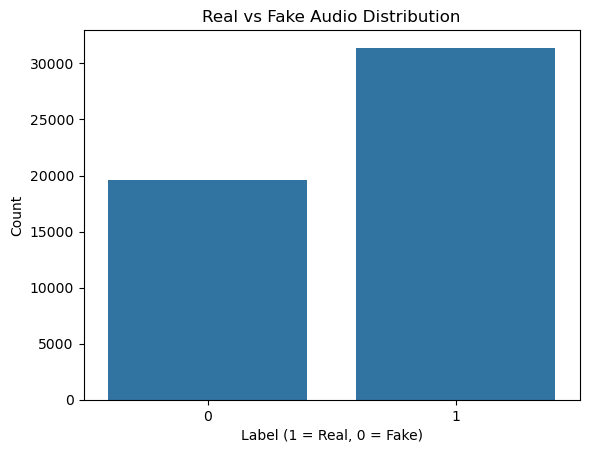

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot label distribution
sns.countplot(data=df, x="label")
plt.title("Real vs Fake Audio Distribution")
plt.xlabel("Label (1 = Real, 0 = Fake)")
plt.ylabel("Count")
plt.show()
